In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn


In [2]:
data=pd.read_csv("../input/capstone/train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(550068, 12)

In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
data['Product_Category_2']=data['Product_Category_2'].fillna((data['Product_Category_2'].mean()))


In [7]:
data['Product_Category_3']=data['Product_Category_3'].fillna((data['Product_Category_3'].mean()))

In [8]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,12.668243,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,12.668243,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,12.668243,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,12.668243,7871


In [9]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
data.drop('User_ID',axis=1,inplace=True)
data.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422


> ***Exploratory data analysis***

In [11]:
pd.crosstab([data['Age'],data['Gender'],data['City_Category']],  columns=data['Purchase'].max())

col_0                       23961
Age   Gender City_Category       
0-17  F      A               1447
             B               1565
             C               2071
      M      A               1097
             B               3870
             C               5052
18-25 F      A               6269
             B              11686
             C               6673
      M      A              21266
             B              31561
             C              22205
26-35 F      A              17491
             B              21437
             C              11824
      M      A              56254
             B              70147
             C              42434
36-45 F      A               7105
             B              11110
             C               8955
      M      A              19512
             B              36488
             C              26843
46-50 F      A               1250
             B               6404
             C               5545
      M      A               6357
             B              14002
             C              12143
51-55 F      A               1778
             B               4243
             C               3873
      M      A               4321
             B              13498
             C              10788
55+   F      A                364
             B               1351
             C               3368
      M      A               3209
             B               3811
             C               9401

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

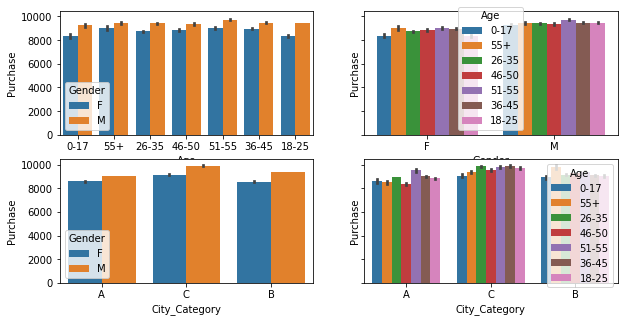

In [12]:
fig, axes = plot.subplots(2,2, figsize=(10, 5),sharey=True)
sn.barplot(ax=axes[0,0],x=data['Age'],y=data['Purchase'],hue=data['Gender'])
sn.barplot(ax=axes[0,1],x=data['Gender'],y=data['Purchase'],hue=data['Age'])
sn.barplot(ax=axes[1,0],x=data['City_Category'],y=data['Purchase'],hue=data['Gender'])
sn.barplot(ax=axes[1,1],x=data['City_Category'],y=data['Purchase'],hue=data['Age'])


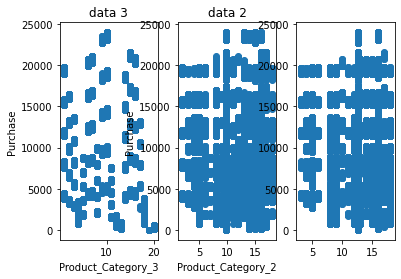

In [13]:
fig = plot.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(data['Product_Category_1'],data['Purchase'])
ax2.scatter(data['Product_Category_2'],data['Purchase'])
ax3.scatter(data['Product_Category_3'],data['Purchase'])

ax1.set_title('data 1')
ax1.set_xlabel('Product_Category_1')
ax1.set_ylabel('Purchase')

ax2.set_title('data 2')
ax2.set_xlabel('Product_Category_2')
ax2.set_ylabel('Purchase')

ax1.set_title('data 3')
ax1.set_xlabel('Product_Category_3')
ax1.set_ylabel('Purchase')

plot.show()

In [14]:
import pandas_profiling as pp

In [15]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***Linear Regression***

In [16]:
data.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000317,0.007265,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,-0.000317,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.007265,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.020833,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


In [17]:
data.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [18]:
data = pd.get_dummies(data, columns = ['Gender','Age','City_Category'])
data.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,P00069042,10,2,0,3,9.842329,12.668243,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,P00248942,10,2,0,1,6.000000,14.000000,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,P00087842,10,2,0,12,9.842329,12.668243,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,P00085442,10,2,0,12,14.000000,12.668243,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,P00285442,16,4+,0,8,9.842329,12.668243,7969,0,1,0,0,0,0,0,0,1,0,0,1


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Product_ID']= label_encoder.fit_transform(data['Product_ID'])
data['Stay_In_Current_City_Years']= label_encoder.fit_transform(data['Stay_In_Current_City_Years'])
  
data.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,672,10,2,0,3,9.842329,12.668243,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,2376,10,2,0,1,6.000000,14.000000,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,852,10,2,0,12,9.842329,12.668243,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,828,10,2,0,12,14.000000,12.668243,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,2734,16,4,0,8,9.842329,12.668243,7969,0,1,0,0,0,0,0,0,1,0,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int64  
 1   Occupation                  550068 non-null  int64  
 2   Stay_In_Current_City_Years  550068 non-null  int64  
 3   Marital_Status              550068 non-null  int64  
 4   Product_Category_1          550068 non-null  int64  
 5   Product_Category_2          550068 non-null  float64
 6   Product_Category_3          550068 non-null  float64
 7   Purchase                    550068 non-null  int64  
 8   Gender_F                    550068 non-null  uint8  
 9   Gender_M                    550068 non-null  uint8  
 10  Age_0-17                    550068 non-null  uint8  
 11  Age_18-25                   550068 non-null  uint8  
 12  Age_26-35                   550068 non-null  uint8  
 13  Age_36-45     

In [21]:
X_train=data.drop(['Purchase'],axis=1)
y_train=data['Purchase']

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.coef_

array([-4.34642242e-01,  6.61847654e+00,  7.12415657e+00, -5.79910485e+01,
       -3.97614913e+02, -8.83503413e+01,  8.09792653e+01, -2.59333330e+02,
        2.59333330e+02, -5.61126796e+02, -2.30182351e+02, -1.85572698e+01,
        1.00440609e+02,  8.57228479e+01,  4.12636107e+02,  2.11066852e+02,
       -2.94634861e+02, -1.28409052e+02,  4.23043913e+02])

In [26]:
model.intercept_

11826.036357563964

In [27]:
y_train.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [28]:
s=model.predict(X_train)
s

array([9462.74200066, 9964.65723411, 5805.97217754, ..., 2142.70952507,
       2874.87067616, 2148.5817792 ])

In [29]:
np.mean((y_train-s)**2)

21778873.30168721

**Accuracy Score =13%**

In [30]:
model.score(X_train,y_train)

0.13682563564559092

***Predicting for Test data***

In [31]:
dataset=pd.read_csv("../input/capstone/test.csv")
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [32]:
dataset.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [33]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [34]:
dataset['Product_Category_2']=data['Product_Category_2'].fillna((data['Product_Category_2'].mean()))


dataset['Product_Category_3']=data['Product_Category_3'].fillna((data['Product_Category_3'].mean()))

In [35]:
dataset.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [36]:
dataset.drop('User_ID',axis=1,inplace=True)
dataset.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,M,46-50,7,B,2,1,1,9.842329,12.668243
1,P00113442,M,26-35,17,C,0,0,3,6.000000,14.000000
2,P00288442,F,36-45,1,B,4+,1,5,9.842329,12.668243


In [37]:
dataset= pd.get_dummies(dataset, columns=['Gender','Age','City_Category'])
dataset.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,P00128942,7,2,1,1,9.842329,12.668243,0,1,0,0,0,0,1,0,0,0,1,0
1,P00113442,17,0,0,3,6.000000,14.000000,0,1,0,0,1,0,0,0,0,0,0,1
2,P00288442,1,4+,1,5,9.842329,12.668243,1,0,0,0,0,1,0,0,0,0,1,0
3,P00145342,1,4+,1,4,14.000000,12.668243,1,0,0,0,0,1,0,0,0,0,1,0
4,P00053842,1,1,0,4,9.842329,12.668243,1,0,0,0,1,0,0,0,0,0,0,1


In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dataset['Product_ID']= label_encoder.fit_transform(dataset['Product_ID'])
dataset['Stay_In_Current_City_Years']= label_encoder.fit_transform(dataset['Stay_In_Current_City_Years'])
  
dataset.head()


,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1144,7,2,1,1,9.842329,12.668243,0,1,0,0,0,0,1,0,0,0,1,0
1,994,17,0,0,3,6.000000,14.000000,0,1,0,0,1,0,0,0,0,0,0,1
2,2672,1,4,1,5,9.842329,12.668243,1,0,0,0,0,1,0,0,0,0,1,0
3,1299,1,4,1,4,14.000000,12.668243,1,0,0,0,0,1,0,0,0,0,1,0
4,519,1,1,0,4,9.842329,12.668243,1,0,0,0,1,0,0,0,0,0,0,1


In [39]:
X_test=dataset

In [40]:
p=model.predict(X_test)
p

array([11306.71632505, 11581.09897039,  8522.71188054, ...,
       10930.62104435,  7973.21837819,  8790.76463789])

In [41]:
model.score(X_test,p)

1.0

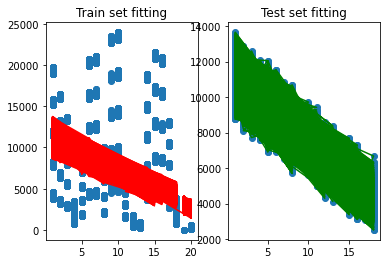

In [42]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plot.subplot(121)
plot.scatter(X_train['Product_Category_1'],y_train)
plot.plot(X_train['Product_Category_1'],s,c='red')
plot.title('Train set fitting')
plot.subplot(122)
plot.scatter(X_test['Product_Category_1'],p)
plot.plot(X_test['Product_Category_1'],p,c='green')
plot.title('Test set fitting')
plot.show()